In [244]:
import sqlite3
import pandas as pd

# Create a SQL connection to our SQLite database
db = sqlite3.connect("mental_health.sqlite")

# Create a cursor object
cur = db.cursor()

# Execute the query to get the list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and display the results
tables = cur.fetchall()
print(tables)

# Each table name is in a tuple, so access the first element
for table in tables:
    print(table[0])
    
# Close the connection
#db.close()

[('Answer',), ('Question',), ('Survey',)]
Answer
Question
Survey


In [245]:
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to a new line

In [246]:
#This is the general construct to use SQL code in Python
#Use the three quotation marks """ to enter SQL block text over multiple lines

query = """SELECT distinct SurveyID FROM Answer;"""
run_sql = pd.read_sql(query, db)
run_sql

,SurveyID
0,2014
1,2016
2,2017
3,2018
4,2019


In [247]:
query = """SELECT * FROM Answer;"""
run_sql = pd.read_sql(query, db)
run_sql

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [248]:
query = """SELECT * FROM Question;"""
run_sql = pd.read_sql(query, db)
run_sql

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,114
101,"If yes, what condition(s) have you been diagnosed with?",115
102,"If maybe, what condition(s) do you believe you have?",116
103,Which of the following best describes your work position?,117


In [249]:
query = """SELECT * FROM Survey;"""
run_sql = pd.read_sql(query, db)
run_sql

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [250]:
query = """SELECT DISTINCT UserID FROM Answer;"""
run_sql = pd.read_sql(query, db)
run_sql

,UserID
0,1
1,2
2,3
3,4
4,5
...,...
4213,4214
4214,4215
4215,4216
4216,4217


## Numbers of people completed survey in each year from 2014-19.

In [251]:
query = """SELECT SurveyID AS Year, COUNT(DISTINCT UserID) AS [People Took Survey] FROM Answer GROUP BY SurveyID ORDER BY SurveyID ASC;"""
year_people = pd.read_sql(query, db)
year_people

,Year,People Took Survey
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


Acccording to the result, in 2016 the most number of people took the mental health survey that is 1,260.
And in 2019, the least number of people took the survet that is 352.

In [252]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Number of people who took survey from 2014-2019')

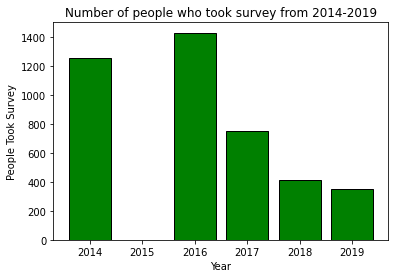

In [253]:
year = year_people['Year']
people = year_people['People Took Survey']
plt.bar(year, people, color='g', edgecolor='k')
plt.xlabel("Year")
plt.ylabel('People Took Survey')
plt.title("Number of people who took survey from 2014-2019")

As we can see there is no bar in the year of 2015. That means the survey didn't happened that year.

## How many questions were there for each year?

In [254]:
query = """SELECT SurveyID AS Year, COUNT(DISTINCT QuestionID) AS [Total Questions] FROM Answer GROUP BY SurveyID ORDER BY SurveyID ASC;"""
year_ques = pd.read_sql(query, db)
year_ques

,Year,Total Questions
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


Text(0.5, 1.0, 'Total number of questions in each survey')

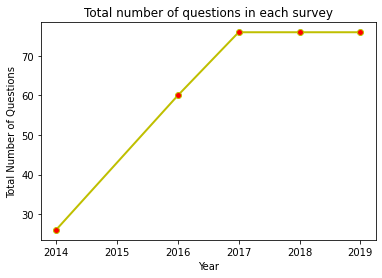

In [255]:
year = year_ques['Year']
question = year_ques['Total Questions']
plt.plot(year, question, color='y', linewidth=2, linestyle='-', markerfacecolor='r', marker='o')
plt.xlabel("Year")
plt.ylabel('Total Number of Questions')
plt.title("Total number of questions in each survey")

## Questions completed by each user in a year.

In [256]:
query = """SELECT SurveyID AS Year, UserId, COUNT(QuestionID) AS [Questions Completed] FROM Answer GROUP BY UserID;"""
ques_complete = pd.read_sql(query, db)
ques_complete

,Year,UserID,Questions Completed
0,2014,1,26
1,2014,2,26
2,2014,3,26
3,2014,4,26
4,2014,5,26
...,...,...,...
4213,2019,4214,76
4214,2019,4215,76
4215,2019,4216,76
4216,2019,4217,76


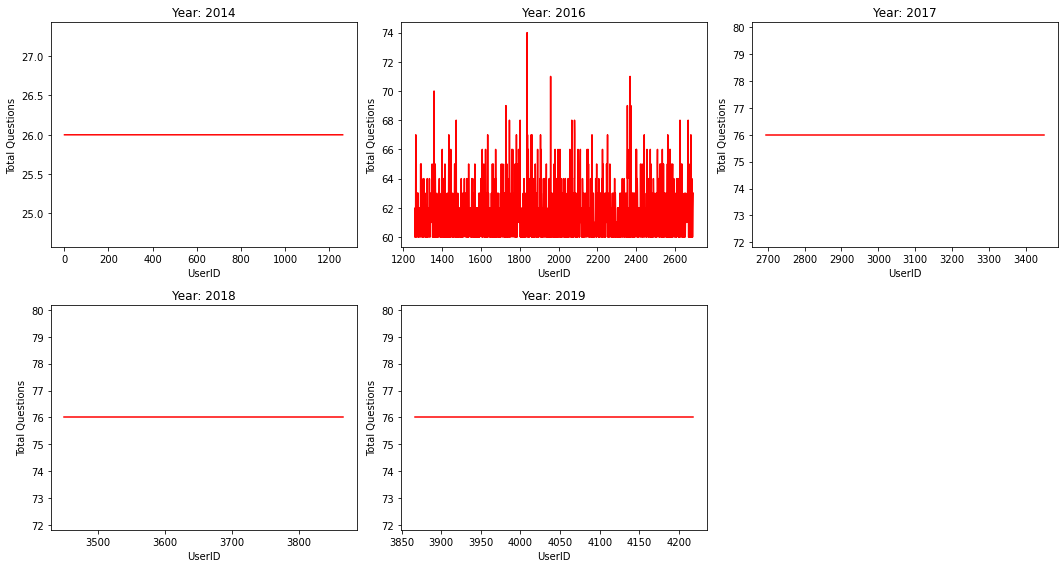

In [257]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
i=0
j=0
year = year_ques['Year'] #Fetching the years fro a previous query as that have distincts year
for idx, x in enumerate(year):
    query ="""SELECT UserId, COUNT(QuestionID) FROM Answer WHERE SurveyID=? GROUP BY UserID;"""
    ques_complete_aux = pd.read_sql(query, db, params=(x,))
    user = ques_complete_aux['UserID']
    tot = ques_complete_aux['COUNT(QuestionID)']
    axes[idx].plot(user, tot, 'r')
    axes[idx].set_title(f"Year: {x}")
    axes[idx].set_xlabel("UserID")
    axes[idx].set_ylabel('Total Questions')
    if idx >= len(axes) - 1:
        break
    #plt.title("Number of people who took survey from 2014-2019")
plt.tight_layout()
axes[5].remove()

in 2014, 2017, 2018, 2019 each user who took the survey attended every questions. But in 2016, every user did not answer every question. 

## Analysing the survey of 2016

In [258]:
query ="""SELECT UserId, COUNT(QuestionID) As Questions_Attended FROM Answer WHERE SurveyID=2016 GROUP BY UserID;"""
year_2016 = pd.read_sql(query, db)
year_2016

,UserID,Questions_Attended
0,1261,60
1,1262,62
2,1263,60
3,1264,61
4,1265,67
...,...,...
1428,2689,60
1429,2690,60
1430,2691,61
1431,2692,62


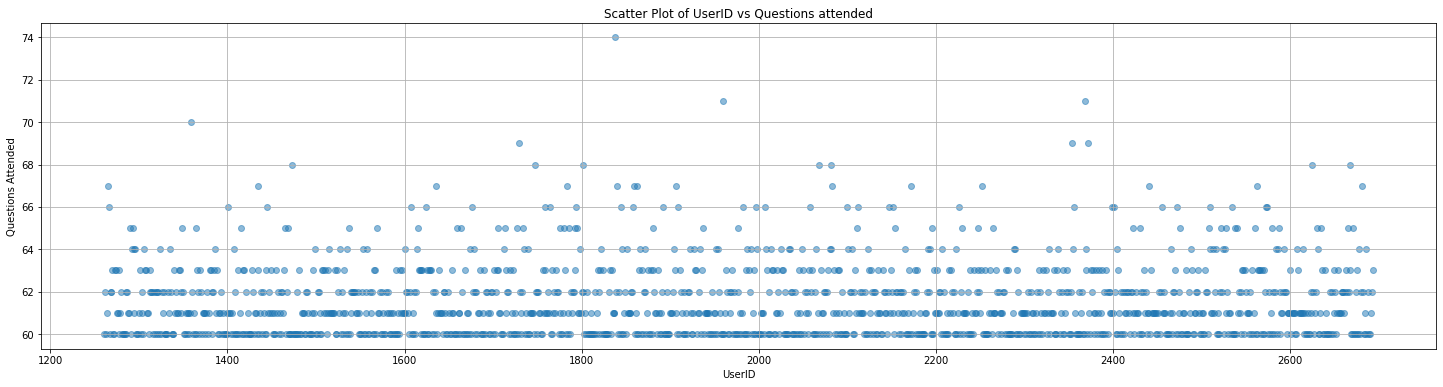

In [259]:
plt.figure(figsize=(25, 6))
plt.scatter(year_2016['UserID'], year_2016['Questions_Attended'], alpha=0.5)
plt.title('Scatter Plot of UserID vs Questions attended')
plt.xlabel('UserID')
plt.ylabel('Questions Attended')
plt.grid()
plt.show()

In [260]:
query ="""SELECT UserId, MAX(Questions_Attended) AS Max_Questions_Attended
FROM (
    SELECT UserId, COUNT(QuestionID) AS Questions_Attended
    FROM Answer
    WHERE SurveyID=2016
    GROUP BY UserId
) AS UserQuestions;"""
year_2016_max = pd.read_sql(query, db)
year_2016_max

,UserId,Max_Questions_Attended
0,1838,74


In [261]:
query ="""SELECT UserId, MIN(Questions_Attended) AS Min_Questions_Attended
FROM (
    SELECT UserId, COUNT(QuestionID) AS Questions_Attended
    FROM Answer
    WHERE SurveyID=2016
    GROUP BY UserId
) AS UserQuestions;"""
year_2016_min = pd.read_sql(query, db)
year_2016_min

,UserId,Min_Questions_Attended
0,1261,60


So, maximum questions was attended by UserUd 1838 which is 74 and userId bearing 1261 answered least questions, 60.

In [262]:
query = """SELECT UserID FROM Answer GROUP BY UserID HAVING COUNT(QuestionID) = 60;"""
xyz = pd.read_sql(query, db)
xyz

,UserID
0,1261
1,1263
2,1267
3,1271
4,1272
...,...
504,2683
505,2684
506,2687
507,2689


These are the users who gave the minimum number of answers in the survey. So there are 509 people who answered only 60 questions. And according to the graph only one user attended 74 questions.

In [263]:
query = """SELECT a.QuestionID, q.questiontext FROM Answer as a JOIN Question as q ON a.QuestionID=q.questionid where UserID=1838"""
ques_all = pd.read_sql(query, db)
ques_all

,QuestionID,questiontext
0,1,What is your age?
1,2,What is your gender?
2,3,What country do you live in?
3,4,"If you live in the United States, which state or territory do you live in?"
4,5,Are you self-employed?
...,...,...
69,117,Which of the following best describes your work position?
70,117,Which of the following best describes your work position?
71,117,Which of the following best describes your work position?
72,117,Which of the following best describes your work position?


According to our previous analysis we know that in year 2016 only 60 questions were asked. Now the userId 1838 has answere 74 questions which leads us to this query which shows that he had answered similar questions several time. Eg, question number 117, he/she had answered the question 5 times. 

## Questions asked in each survey

In [264]:
query = """SELECT DISTINCT a.QuestionID, q.questiontext FROM Answer as a JOIN Question as q ON a.QuestionID=q.questionid"""
ques_all = pd.read_sql(query, db)
ques_all

,QuestionID,questiontext
0,1,What is your age?
1,2,What is your gender?
2,3,What country do you live in?
3,4,"If you live in the United States, which state or territory do you live in?"
4,5,Are you self-employed?
...,...,...
100,88,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)
101,89,What is your race?
102,115,"If yes, what condition(s) have you been diagnosed with?"
103,116,"If maybe, what condition(s) do you believe you have?"


So, in 5 years in total of 105 questions were asked.

In [265]:
query="""
WITH aux as(SELECT QuestionID, COUNT(QuestionID) AS c FROM Answer GROUP BY QuestionID)
SELECT x.QuestionID, q.questiontext FROM aux AS x JOIN Question as q ON x.QuestionId=q.questionid WHERE x.c = (SELECT MIN(c) FROM aux);
"""
ques_min = pd.read_sql(query, db)
ques_min

,QuestionID,questiontext
0,92,"If you have a mental health condition, do you feel that it interferes with your work?"
1,93,Do you work remotely (outside of an office) at least 50% of the time?
2,94,Do you know the options for mental health care your employer provides?
3,95,Has your employer ever discussed mental health as part of an employee wellness program?
4,96,Does your employer provide resources to learn more about mental health issues and how to seek help?
5,97,How easy is it for you to take medical leave for a mental health condition?
6,98,Do you think that discussing a mental health issue with your employer would have negative consequences?
7,99,Would you be willing to discuss a mental health issue with your coworkers?
8,100,Would you be willing to discuss a mental health issue with your direct supervisor(s)?
9,101,Would you bring up a physical health issue with a potential employer in an interview?


These are the least answered questions.

## Age group of people who took survey

In [266]:
query = """SELECT CAST(Answertext AS INTEGER) as age, COUNT(Answertext) AS counts FROM Answer WHERE QuestionId=1 GROUP BY Answertext"""
age = pd.read_sql(query, db)
age

,age,counts
0,-1,5
1,-29,1
2,0,1
3,11,1
4,15,1
...,...,...
60,70,1
61,72,1
62,74,1
63,8,1


In [267]:
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 91, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
age['Age_Group'] = pd.cut(age['age'], bins=bins, labels=labels, right=False)
age_group_counts = age['Age_Group'].value_counts().sort_index()

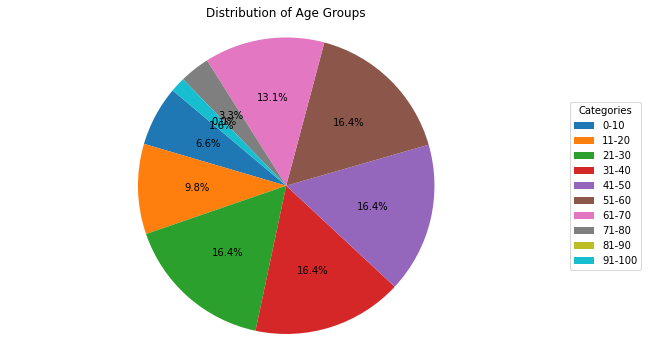

In [268]:
Age_Group = age['Age_Group']
plt.figure(figsize=(10, 6))
wedges, texts, autotexts=plt.pie(age_group_counts, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Title and formatting
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## How many people of each gender completed the survey for each year?

In [269]:
query = """SELECT SurveyID,
AnswerText as gender,
count(distinct UserID) as responses
FROM Answer
WHERE QuestionID = 2
GROUP BY SurveyID, AnswerText;"""
gender = pd.read_sql(query, db)
gender

,SurveyID,gender,responses
0,2014,A little about you,1
1,2014,Agender,1
2,2014,All,1
3,2014,Androgyne,1
4,2014,Enby,1
...,...,...,...
130,2019,female,27
131,2019,femmina,1
132,2019,male,52
133,2019,masculino,1


## How many people of each gender completed the survey for each year?

In [270]:
query = """SELECT SurveyID AS year,
AnswerText as country,
count(distinct UserID) as responses
FROM Answer
WHERE QuestionID = 3
GROUP BY SurveyID, AnswerText ORDER BY responses DESC;"""
country = pd.read_sql(query, db)
country.head(20)

,year,country,responses
0,2016,United States of America,840
1,2014,United States,751
2,2017,United States of America,497
3,2018,United States of America,312
4,2019,United States of America,204
5,2014,United Kingdom,185
6,2016,United Kingdom,180
7,2016,Canada,78
8,2014,Canada,72
9,2017,United Kingdom,66


So, United states of america, United Kingdom, Canada has the most number of people who took the survey in 5 years.

In [271]:
cases=[]
cor_year=[]
for index, row in country.iterrows():
    if row['country'] in ['United States of America', 'United States']:
        cases.append(row['responses'])
        cor_year.append(row['year'])

Text(0.5, 1.0, 'Survey in USA')

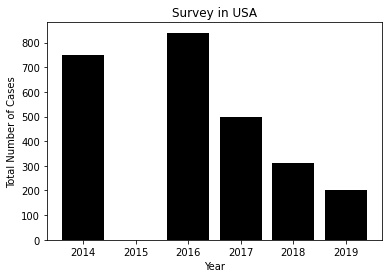

In [272]:
plt.bar(cor_year, cases, color='k')
plt.xlabel("Year")
plt.ylabel('Total Number of Cases')
plt.title("Survey in USA")

Text(0.5, 1.0, 'Survey in UK')

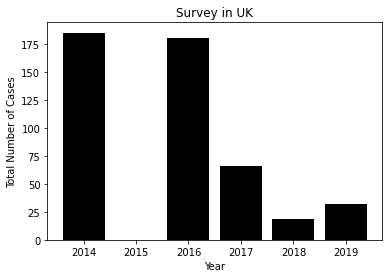

In [273]:
cases=[]
cor_year=[]
for index, row in country.iterrows():
    if row['country'] in ['United Kingdom']:
        cases.append(row['responses'])
        cor_year.append(row['year'])
plt.bar(cor_year, cases, color='k')
plt.xlabel("Year")
plt.ylabel('Total Number of Cases')
plt.title("Survey in UK")

Text(0.5, 1.0, 'Survey in Canada')

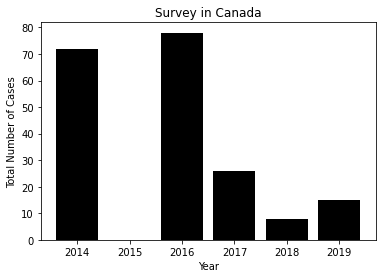

In [274]:
cases=[]
cor_year=[]
for index, row in country.iterrows():
    if row['country'] in ['Canada']:
        cases.append(row['responses'])
        cor_year.append(row['year'])
plt.bar(cor_year, cases, color='k')
plt.xlabel("Year")
plt.ylabel('Total Number of Cases')
plt.title("Survey in Canada")

Text(0.5, 1.0, 'Survey in Germany')

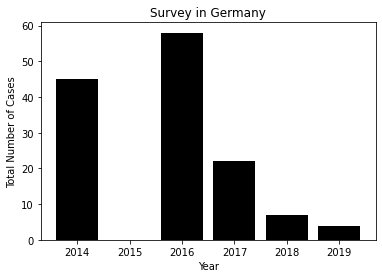

In [275]:
cases=[]
cor_year=[]
for index, row in country.iterrows():
    if row['country'] in ['Germany']:
        cases.append(row['responses'])
        cor_year.append(row['year'])
plt.bar(cor_year, cases, color='k')
plt.xlabel("Year")
plt.ylabel('Total Number of Cases')
plt.title("Survey in Germany")

Text(0.5, 1.0, 'Survey in Australia')

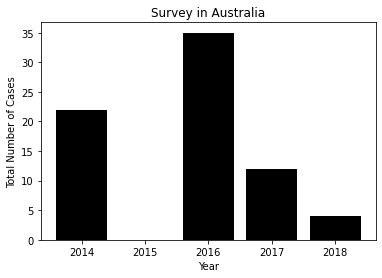

In [276]:
cases=[]
cor_year=[]
for index, row in country.iterrows():
    if row['country'] in ['Australia']:
        cases.append(row['responses'])
        cor_year.append(row['year'])
plt.bar(cor_year, cases, color='k')
plt.xlabel("Year")
plt.ylabel('Total Number of Cases')
plt.title("Survey in Australia")

## Mental Illness based on which country they work

In [277]:
query = """SELECT SurveyID AS year,
AnswerText as country,
count(distinct UserID) as responses
FROM Answer
WHERE QuestionID = 50
GROUP BY SurveyID, AnswerText ORDER BY responses DESC;"""
work_country = pd.read_sql(query, db)
work_country.head(20)

,year,country,responses
0,2016,United States of America,851
1,2017,United States of America,503
2,2018,United States of America,314
3,2019,United States of America,204
4,2016,United Kingdom,183
5,2016,Canada,74
6,2017,United Kingdom,66
7,2016,Germany,58
8,2016,Netherlands,47
9,2016,Australia,34


People who work in United States of America tend to suffer from metal illness more compared to other countries.

## Is mental illness genetic?

In [278]:
query = """
SELECT
AnswerText as response,
count(distinct UserID) as counts
FROM Answer
WHERE QuestionID = 6
GROUP BY AnswerText ORDER BY counts DESC;"""
gen = pd.read_sql(query, db)
gen

,response,counts
0,Yes,1868
1,No,1701
2,I don't know,649


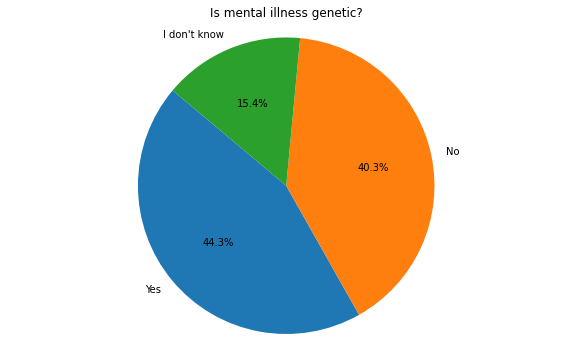

In [279]:
#counts=gen[counts]
#response=gen[response]
plt.figure(figsize=(10, 6))
plt.pie(gen['counts'], labels=gen['response'], autopct='%1.1f%%', startangle=140)
# Title and formatting
plt.title('Is mental illness genetic?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## Negative consequences of discussing of mental health condition

In [280]:
query = """
SELECT
AnswerText as response,
count(distinct UserID) as counts
FROM Answer
WHERE QuestionID = 104
GROUP BY AnswerText ORDER BY counts DESC;"""
gen = pd.read_sql(query, db)
gen

,response,counts
0,Maybe,487
1,No,438
2,-1,287
3,Yes,221


There are 221 people who feel that discussing about their mental health condition will have some negative consequences, it can be in workplaces, in friendsgroup, in home. And also there are 487 people who don't know what will happen if they discuss about their mental health condition.

In [281]:
db.close

<function Connection.close>